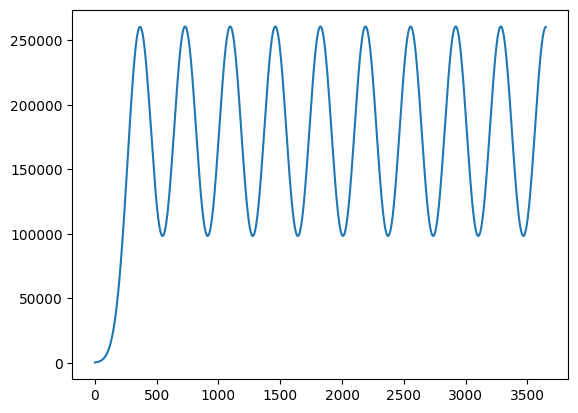

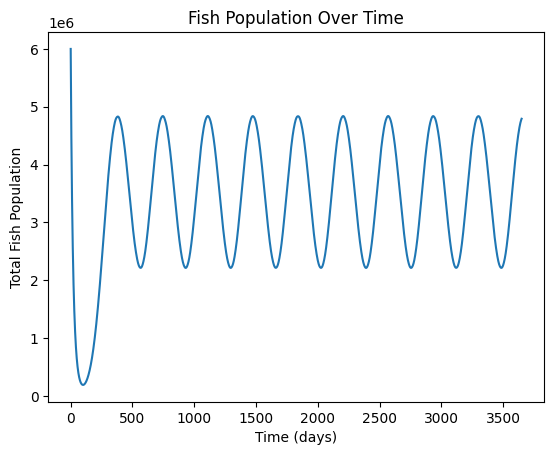

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


k = 1

def fisheries(t):
    #return 300 * np.cos(2 * np.pi * t/180) + sigma0
    sigma = 10000
    return 260_000 * np.exp(-1/2 * ((t-365)**2)/sigma) + 260_000 * np.exp(-1/2 * ((t-730)**2)/sigma) + 260_000 * np.exp(-1/2 * ((t-1095)**2)/sigma)\
+ 260_000 * np.exp(-1/2 * ((t-1460)**2)/sigma) + 260_000 * np.exp(-1/2 * ((t-1825)**2)/sigma) + 260_000 * np.exp(-1/2 * ((t-2190)**2)/sigma)\
+ 260_000 * np.exp(-1/2 * ((t-2555)**2)/sigma) + 260_000 * np.exp(-1/2 * ((t-2920)**2)/sigma) + 260_000 * np.exp(-1/2 * ((t-3285)**2)/sigma) + \
260_000 * np.exp(-1/2 * ((t-3650)**2)/sigma)




# Parameters dictionary
par = {
    'F':fisheries,
    'gamma': 0.11,
    'k': 40_000_000,
    'mu_TF':0.15
}



plt.plot([fisheries(t) for t in range(3650)])
plt.show()


# Total fish population model
def TF(t, y, par):
    dTF = par['gamma'] * y[0] * (1 - y[0] / par['k']) - par['mu_TF'] * y[0] + par['F'](t)

    return np.array([dTF])

# Initial conditions and time span
y0 = [6_000_000]
t = (0, 3650)

# Solve the differential equation
sol = solve_ivp(fun=lambda t, y: TF(t, y, par), t_span=t, y0=y0, t_eval=np.linspace(t[0], t[1], 10000))

# Plot the solution
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time (days)')
plt.ylabel('Total Fish Population')
plt.title('Fish Population Over Time')
plt.show()

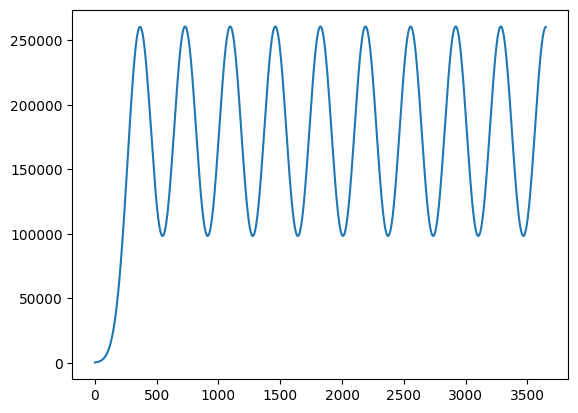

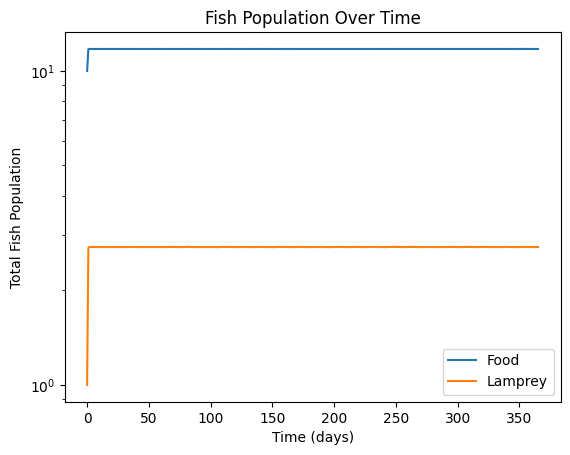

In [5]:
'''Lamprey Model'''

def fisheries(t):
    #return 300 * np.cos(2 * np.pi * t/180) + sigma0
    sigma = 10000
    return 260_000 * np.exp(-1/2 * ((t-365)**2)/sigma) + 260_000 * np.exp(-1/2 * ((t-730)**2)/sigma) + 260_000 * np.exp(-1/2 * ((t-1095)**2)/sigma)\
+ 260_000 * np.exp(-1/2 * ((t-1460)**2)/sigma) + 260_000 * np.exp(-1/2 * ((t-1825)**2)/sigma) + 260_000 * np.exp(-1/2 * ((t-2190)**2)/sigma)\
+ 260_000 * np.exp(-1/2 * ((t-2555)**2)/sigma) + 260_000 * np.exp(-1/2 * ((t-2920)**2)/sigma) + 260_000 * np.exp(-1/2 * ((t-3285)**2)/sigma) + \
260_000 * np.exp(-1/2 * ((t-3650)**2)/sigma)




par = {"alpha":1.1,"beta":0.4,"delta":0.1,"gamma":0.4}


plt.plot([fisheries(t) for t in range(3650)])
plt.show()


# Total fish population model
def TF(t, y, par):

    F,L = y

    dF = par['alpha'] * F - par['beta'] * F * L
    dL = par['delta'] * L * F - par['gamma'] * L

    return np.array(dF,dL)


# Initial conditions and time span
y0 = [10,1]
t = (0, 365)

# Solve the differential equation
sol = solve_ivp(fun=lambda t, y: TF(t, y, par), t_span=t, y0=y0, t_eval=np.linspace(t[0], t[1], 365))

# Plot the solution

labels = ["Food","Lamprey"]

for i in range(2):
    plt.plot(sol.t, sol.y[i],label = labels[i])

plt.legend()
plt.yscale('log')
plt.xlabel('Time (days)')
plt.ylabel('Total Fish Population')
plt.title('Fish Population Over Time')
plt.show()
